In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download('wordnet') # Download the 'wordnet' dataset
nltk.download('stopwords') # Download the 'stopwords' dataset

#Importing NLP plugins
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
import string

from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Importing our Sklearn Plugins
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#importing our models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [ ]:

df= pd.read_csv("/content/DataSet2.csv")
df.shape

(17880, 18)

In [ ]:
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17880 non-null  object
 6   requirements         15191 non-null  object
 7   benefits             10684 non-null  object
 8   telecommuting        17880 non-null  object
 9   has_company_logo     17880 non-null  object
 10  has_questions        17880 non-null  object
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

In [ ]:
# Check percentage of data missing for each feature
df.isna().sum()/len(df)

,0
title,0.000000
location,0.019351
department,0.645805
salary_range,0.839597
company_profile,0.185011
description,0.000000
requirements,0.150391
benefits,0.402461
telecommuting,0.000000
has_company_logo,0.000000


In [ ]:
df.nunique()

,0
title,11231
location,3105
department,1337
salary_range,874
company_profile,1710
description,15095
requirements,12119
benefits,6510
telecommuting,2
has_company_logo,2


In [ ]:
df['requirements'].isnull().sum()

np.int64(2689)

In [ ]:
df['description'].isnull().sum()

np.int64(0)

In [ ]:
df1=df['requirements'].copy()

In [ ]:
df1

,requirements
0,<ul>\r\n<li>Experience with content management...
1,<p><b>What we expect from you:</b></p>\r\n<p>Y...
2,<ul>\r\n<li>Implement pre-commissioning and co...
3,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...
4,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...
...,...
17875,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...
17876,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...
17877,<ul>\r\n<li>At least 12 years professional exp...
17878,<p>1. Must be fluent in the latest versions of...


In [ ]:
df1 = df1.fillna('No requirements provided')


In [ ]:
df1

,requirements
0,<ul>\r\n<li>Experience with content management...
1,<p><b>What we expect from you:</b></p>\r\n<p>Y...
2,<ul>\r\n<li>Implement pre-commissioning and co...
3,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...
4,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...
...,...
17875,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...
17876,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...
17877,<ul>\r\n<li>At least 12 years professional exp...
17878,<p>1. Must be fluent in the latest versions of...


In [ ]:
df1.isnull().sum()

np.int64(0)

In [ ]:
df['text']=df['description']+df1

In [ ]:
df['text'].loc[3]

"<p><b>THE COMPANY: ESRI – Environmental Systems Research Institute</b></p>\r\n<p>Our passion for improving quality of life through geography is at the heart of everything we do.\xa0 Esri’s geographic information system (GIS) technology inspires and enables governments, universities and businesses worldwide to save money, lives and our environment through a deeper understanding of the changing world around them.</p>\r\n<p>Carefully managed growth and zero debt give Esri stability that is uncommon in today's volatile business world.\xa0 Privately held, we offer exceptional benefits, competitive salaries, 401(k) and profit-sharing programs, opportunities for personal and professional growth, and much more.</p>\r\n<p><b>THE OPPORTUNITY: Account Executive</b></p>\r\n<p>As a member of the Sales Division, you will work collaboratively with an account team in order to sell and promote adoption of Esri’s ArcGIS platform within an organization. As part of an account team, you will be responsibl

In [ ]:
df['fraudulent']

,fraudulent
0,f
1,f
2,f
3,f
4,f
...,...
17875,f
17876,f
17877,f
17878,f


In [ ]:
# Get all unique characters from the 'text' column
chars = set()

for value in df['text']:
    if isinstance(value, str):
        chars.update(set(value))

print(sorted(chars))  # Optional: sort to make it easier to view


['\t', '\n', '\r', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x85', '\x92', '\x96', '\x9f', '\xa0', '¢', '£', '¤', '§', '¨', '©', '«', '\xad', '®', '°', '´', '·', '»', '¼', '½', '¿', 'Á', 'Â', 'Å', 'É', 'Î', 'Ó', '×', 'Ø', 'Ü', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'è', 'é', 'ê', 'ë', 'í', 'ï', 'ñ', 'ó', 'ö', 'ø', 'ú', 'ü', 'Ą', 'ą', 'ć', 'Ę', 'ę', 'ł', 'ń', 'ś', 'š', 'ż', 'ʻ', 'ʼ', '˚', '̈', '΄', 'Ά', 'Έ', 'Ό', 'Α', 'Β', 'Γ', 'Δ', 'Ε', 'Ζ', 'Η', 'Θ', 'Ι', 'Κ', 'Λ', 'Μ', 'Ν', 'Ξ', 'Ο', 'Π', 'Ρ', 'Σ', 'Τ', 'Υ', 'Φ', 'Χ', 'Ψ', 'Ω', 'ά', 'έ', 'ή', 'ί',

In [ ]:
import re
def remove_bullet_points(text):
    # Define pattern to match bullet points
    bullet_point_pattern = re.compile(r'\s*[\u2022\u2023\u25E6]\s*')  # Matches •, ‣, and ◦ bullet points

    # Remove bullet points from the text
    cleaned_text = bullet_point_pattern.sub(' ', text)

    return cleaned_text
def remove_emojis_and_symbols_from_text(text):
    # Define pattern to match emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           u"\u00ae" # trade Marks ®
                           u"\u00A9" # copy Right ©
                           u"\u2122" # Trade Mark TM
                           u"\u200b"
                           "]+", flags=re.UNICODE)
    # Remove emojis from the text
    cleaned_text = emoji_pattern.sub(r' ', text)
    return cleaned_text
def decontraction(x):
    contractions = {
        "you've": 'you have',
        "you're": 'you are',
        "haven't": 'have not',
        "hasn't": 'has not',
        "hadn't've": 'had not have',
        "hadn't": 'had not',
        "don't": 'do not',
        "doesn't": 'does not',
        "didn't": 'did not',
        "couldn't've": 'could not have',
        "couldn't": 'could not',
        "could've": 'could have',
        "'cause": 'because',
        "can't've": 'cannot have',
        "aren't": 'are not',
        "ain't": 'am not',
        "can't": 'can not',
        "won't": 'will not',
        "he'd": 'he would',
        "he'd've": 'he would have',
        "he'll": 'he will',
        "he'll've": 'he will have',
        "he's": 'he is',
        "how'd": 'how did',
        "how'd'y": 'how do you',
        "how'll": 'how will',
        "how's": 'how does',
        "i'd": 'i would',
        "i'd've": 'i would have',
        "i'll": 'i will',
        "i'll've": 'i will have',
        "i'm": 'i am',
        "i've": 'i have',
        "isn't": 'is not',
        "it'd": 'it would',
        "it'd've": 'it would have',
        "it'll": 'it will',
        "it'll've": 'it will have',
        "it's": 'it is',
        "let's": 'let us',
        "ma'am": 'madam',
        "mayn't": 'may not',
        "might've": 'might have',
        "mightn't": 'might not',
        "mightn't've": 'might not have',
        "must've": 'must have',
        "mustn't": 'must not',
        "mustn't've": 'must not have',
        "needn't": 'need not',
        "needn't've": 'need not have',
        "o'clock": 'of the clock',
        "oughtn't": 'ought not',
        "oughtn't've": 'ought not have',
        "shan't": 'shall not',
        "sha'n't": 'shall not',
        "shan't've": 'shall not have',
        "she'd": 'she would',
        "she'd've": 'she would have',
        "she'll": 'she will',
        "she'll've": 'she will have',
        "she's": 'she is',
        "should've": 'should have',
        "shouldn't": 'should not',
        "shouldn't've": 'should not have',
        "so've": 'so have',
        "so's": 'so is',
        "that'd": 'that would',
        "that'd've": 'that would have',
        "that's": 'that is',
        "there'd": 'there would',
        "there'd've": 'there would have',
        "there's": 'there is',
        "they'd": 'they would',
        "they'd've": 'they would have',
        "they'll": 'they will',
        "they'll've": 'they will have',
        "they're": 'they are',
        "they've": 'they have',
        "to've": 'to have',
        "wasn't": 'was not',
        "we're": 'we are',
        "'s": " is",
        "n't": ' not',
        "'re": ' are',
        "'d": ' would',
        "'ll": ' will',
        "'t": ' not',
        "'ve": ' have',
        "'m": ' am',
        ' u ': ' you ',
        ' ur ': ' your ',
        ' n ': ' and '
    }

    contractions_comma = {
        "you’ve": 'you have',
        "you’re": 'you are',
        "haven’t": 'have not',
        "hasn’t": 'has not',
        "hadn’t've": 'had not have',
        "hadn’t": 'had not',
        "don’t": 'do not',
        "doesn’t": 'does not',
        "didn’t": 'did not',
        "couldn’t’ve": 'could not have',
        "couldn’t": 'could not',
        "could’ve": 'could have',
        "’cause": 'because',
        "can’t’ve": 'cannot have',
        "aren’t": 'are not',
        "ain’t": 'am not',
        "can’t": 'can not',
        "won’t": 'will not',
        "he’d": 'he would',
        "he'd've": 'he would have',
        "he’ll": 'he will',
        "he’ll’ve": 'he will have',
        "he’s": 'he is',
        "how’d": 'how did',
        "how’d'y": 'how do you',
        "how’ll": 'how will',
        "how’s": 'how does',
        "i’d": 'i would',
        "i’d’ve": 'i would have',
        "i’ll": 'i will',
        "i’ll’ve": 'i will have',
        "i’m": 'i am',
        "i’ve": 'i have',
        "isn’t": 'is not',
        "it’d": 'it would',
        "it’d’ve": 'it would have',
        "it’ll": 'it will',
        "it'll've": 'it will have',
        "it’s": 'it is',
        "let's": 'let us',
        "ma’am": 'madam',
        "mayn’t": 'may not',
        "might’ve": 'might have',
        "mightn’t": 'might not',
        "mightn’t've": 'might not have',
        "must’ve": 'must have',
        "mustn’t": 'must not',
        "mustn’t’ve": 'must not have',
        "needn’t": 'need not',
        "needn’t’ve": 'need not have',
        "o’clock": 'of the clock',
        "oughtn’t": 'ought not',
        "oughtn’t’ve": 'ought not have',
        "shan’t": 'shall not',
        "sha’n’t": 'shall not',
        "shan’t’ve": 'shall not have',
        "she’d": 'she would',
        "she’d’ve": 'she would have',
        "she’ll": 'she will',
        "she’ll’ve": 'she will have',
        "she’s": 'she is',
        "should’ve": 'should have',
        "shouldn’t": 'should not',
        "shouldn't've": 'should not have',
        "so’ve": 'so have',
        "so's": 'so is',
        "that’d": 'that would',
        "that’d've": 'that would have',
        "that’s": 'that is',
        "there’d": 'there would',
        "there’d’ve": 'there would have',
        "there’s": 'there is',
        "they’d": 'they would',
        "they’d've": 'they would have',
        "they’ll": 'they will',
        "they’ll've": 'they will have',
        "they’re": 'they are',
        "they’ve": 'they have',
        "to’ve": 'to have',
        "wasn’t": 'was not',
        "we’re": 'we are',
        "’s": " is",
        "n’t": ' not',
        "’re": ' are',
        "’d": ' would',
        "’ll": ' will',
        "’t": ' not',
        "’ve": ' have',
        "’m": ' am',
        ' u ': ' you ',
        ' ur ': ' your ',
        ' n ': ' and '
    }

    for key in contractions:
        value = contractions[key]
        x = x.replace(key, value)

    for key in contractions_comma:
        value = contractions_comma[key]
        x = x.replace(key, value)
    return x

def removepunc(x):
    punctuation = '!\xad\xa0\xe2\x80\x9d\xe2\x80\x99\xe2\x80\xa2()*+-/:;<=>[]^_`{|}~@#,.?$%&"”“’‘\'…<>«»'
    translation_table = str.maketrans(punctuation, ' ' * len(punctuation))
    return x.translate(translation_table)

def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, ' ', text)

def remove_ampersand(text):
    text = text.replace('&amp;', '')
    text = text.replace('andamp;', '')
    return text
def remove_code_from_text(text):
    # Defining the pattern to match the code
    code_pattern = r'\b[0-9a-fA-F]{64}\b'  # Assuming the code is a 64-character hexadecimal string

    # Remove the code from the text
    cleaned_text = re.sub(code_pattern, ' ', text)

    return cleaned_text
def remove_number_from_text(text):
    # Defining the pattern to match the code
    number_pattern = r'[0-9]'  # Assuming the code is a 64-character hexadecimal string

    # Remove the code from the text
    cleaned_text = re.sub(number_pattern, ' ', text)

    return cleaned_text
def remove_greek_words(text):
    # Define pattern to match Greek words
    greek_pattern = re.compile(r'\b[α-ωΑ-Ωίϊΐόάέύϋΰήώ]+\b', flags=re.IGNORECASE)

    # Remove Greek words from the text
    cleaned_text = greek_pattern.sub(' ', text)

    return cleaned_text
def remove_russian_words(text):
    # Define pattern to match Russian words
    russian_pattern = re.compile(r'\b[а-яА-Я]+\b')  # Matches Russian words

    # Remove Russian words from the text
    cleaned_text = russian_pattern.sub('', text)

    return cleaned_text
def remove_thai_words(text):
    # Remove Thai characters using regular expression
    cleaned_text = re.sub(r'[\u0E00-\u0E7F]', ' ', text)

    return cleaned_text
def remove_currency_symbols(text):
    # Define pattern to match currency symbols
    currency_pattern = re.compile(r'[$€¥₹£¢₽₩₪₴₱₨฿₦₮₲₭₵₿]')  # Matches any currency symbol

    # Remove currency symbols from the text
    cleaned_text = currency_pattern.sub(' ', text)

    return cleaned_text
def remove_hyphens(text):
    # Define pattern to match hyphens within words
    hyphen_pattern = re.compile(r'\b(\w+)[-—‑–](\w+)\b')  # Matches hyphens within words

    # Remove hyphens from the text
    cleaned_text = hyphen_pattern.sub(r'\1 \2', text)

    return cleaned_text
def text_processing(text):

    # Lowercasing text
    text = text.lower()

    # Removing URLs from text
    text = re.sub(r"http\S+", "", text)

    # Removing newline character
    text = re.sub(r"\n", "", text)

    # Replacing & character with 'and'
    text = re.sub(r"&", "and", text)

    # Removing HTML tags
    text = remove_html_tags(text)

    # Removing ampersand from the text
    text = remove_ampersand(text)

    # Performing decontraction on the text
    text = decontraction(text)

    # Removing the punctuations from the text
    text = removepunc(text)

    # Removing 64-character hexadecimal string in the text
    text = remove_code_from_text(text)

    # Removing number in the text
    text = remove_number_from_text(text)

    # Removing emojis from text
    text = remove_emojis_and_symbols_from_text(text)

    # Remove •, ‣, and ◦ bullet points
    text = remove_bullet_points(text)

    # Remove greek words from the text
    text = remove_greek_words(text)

    # Remove russian words from the text
    text = remove_russian_words(text)

    # Remove thai words from the text
    text = remove_thai_words(text)

    # Remove hyphens from hyphenated word
    text = remove_hyphens(text)

    # Remove currency symbols from the text
    text = remove_currency_symbols(text)

    # Removing extra space in the text
    text = remove_extra_spaces(text)

    return text
df['cleaned_text'] = df['text'].apply(text_processing)

In [ ]:

df['text'].loc[30]

'<p>The\xa0Customer Service Technical Specialist will be based in our Waltham, MA client location. The right candidate will be an integral part of our talented team, supporting our continued growth.\xa0</p>\r\n<p><b>Responsibilities:</b></p>\r\n<ul>\r\n<li>Identify objective data and enter ("key what you see") at a high level of productivity and accuracy</li>\r\n<li>Perform data entry task from a paper and/or document image</li>\r\n<li>Utilize system functions to perform data look-up and validation</li>\r\n<li>Perform entry of data presented in structured forms, correspondence text or presented out of context in character strings</li>\r\n<li>Perform document image quality validation, including document type confirmation and verification of image quality and clarity</li>\r\n<li>Identify, classify and sort documents by assigning document types within the data entry application</li>\r\n<li>Prep documents for scanning to include; separate document by type, separate multiple page documents 

In [ ]:
df['cleaned_text'].loc[30]

' the customer service technical specialist will be based in our waltham ma client location the right candidate will be an integral part of our talented team supporting our continued growth responsibilities identify objective data and enter key what you see at a high level of productivity and accuracy perform data entry task from a paper and or document image utilize system functions to perform data look up and validation perform entry of data presented in structured forms correspondence text or presented out of context in character strings perform document image quality validation including document type confirmation and verification of image quality and clarity identify classify and sort documents by assigning document types within the data entry application prep documents for scanning to include separate document by type separate multiple page documents from single page documents ensure all paper clips staples and other fasteners are removed and sort individual document types by siz

In [ ]:
print(df['fraudulent'].unique())

['f' 't']


In [ ]:
df['fraudulent']=df['fraudulent'].map({'f':0,'t':1})
df['fraudulent']

,fraudulent
0,0
1,0
2,0
3,0
4,0
...,...
17875,0
17876,0
17877,0
17878,0


In [ ]:
print(df['fraudulent'].unique())

[0 1]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust 'max_features' to control the number of features

# Fit and transform the 'cleaned_text' column
X_tfidf = vectorizer.fit_transform(df['cleaned_text']).toarray()

# Output shape to see the transformation result
print(X_tfidf.shape)  # (num_samples, num_features)


(17880, 5000)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['fraudulent'], test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (14304, 5000)
Test set: (3576, 5000)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model with the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model performance
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9681208053691275
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3395
           1       0.70      0.65      0.67       181

    accuracy                           0.97      3576
   macro avg       0.84      0.82      0.83      3576
weighted avg       0.97      0.97      0.97      3576



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model with the training data
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.9653243847874721
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3395
           1       1.00      0.31      0.48       181

    accuracy                           0.97      3576
   macro avg       0.98      0.66      0.73      3576
weighted avg       0.97      0.97      0.96      3576



In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model with the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, classification_report
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9742729306487695
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3395
           1       0.96      0.51      0.67       181

    accuracy                           0.97      3576
   macro avg       0.97      0.76      0.83      3576
weighted avg       0.97      0.97      0.97      3576



In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model_rbf = SVC(kernel='rbf', random_state=42)

# Train the model with the training data
svm_model_rbf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm_rbf = svm_model_rbf.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, classification_report
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm_rbf))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm_rbf))

SVM Accuracy: 0.977069351230425
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       1.00      0.55      0.71       181

    accuracy                           0.98      3576
   macro avg       0.99      0.77      0.85      3576
weighted avg       0.98      0.98      0.97      3576



In [ ]:
# @title Default title text
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Example: Grid of parameters
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

# Initialize base model
svm = SVC(probability=True)

# Grid search
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1', verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


NameError: name 'X_train' is not defined

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'class_weight': ['balanced']
}

lr = LogisticRegression(max_iter=1000)
grid = GridSearchCV(lr, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)
y_pred_best_log=grid.predict(X_test)
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Fine tuned Logistic Regression:", accuracy_score(y_test, y_pred_best_log))
print("Fine tuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_best_log))


Best Parameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Fine tuned Logistic Regression: 0.9664429530201343
Fine tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3395
           1       0.64      0.75      0.69       181

    accuracy                           0.97      3576
   macro avg       0.82      0.86      0.84      3576
weighted avg       0.97      0.97      0.97      3576



In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),  # best k from GridSearch
    'SVM': SVC(kernel='linear', random_state=42),
    'Fine tuned Logistic Regression': GridSearchCV(lr, param_grid, cv=5, scoring='f1', n_jobs=-1)

}

In [ ]:
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

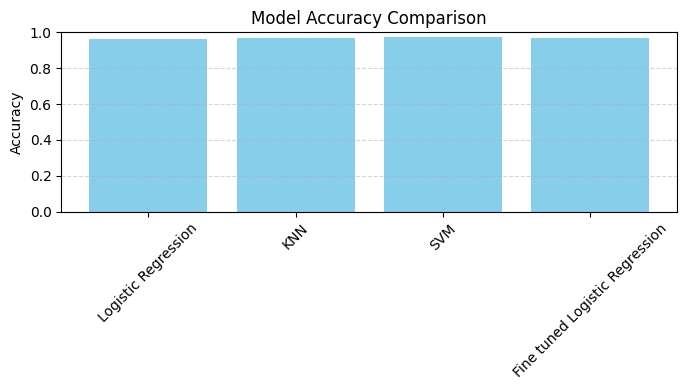

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(7,4))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting of neighbors
    'metric': ['euclidean', 'manhattan'],  # Distance metrics
    'leaf_size': [10, 20, 30],  # Leaf size for KNN algorithm
}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV with cross-validation
grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the training data
grid_search_knn.fit(X_train, y_train)

# Output the best parameters
print("Best KNN Parameters:", grid_search_knn.best_params_)

# Train the model with the best parameters
best_knn_model = grid_search_knn.best_estimator_

# Make predictions on the test set
y_pred_best_knn = best_knn_model.predict(X_test)

# Evaluate the model performance
print("Best KNN Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("Best KNN Classification Report:")
print(classification_report(y_test, y_pred_best_knn))


Fitting 5 folds for each of 60 candidates, totalling 300 fits


KeyboardInterrupt: 

In [ ]:
new_message = ["Are you looking to earn $300–$500 daily from the comfort of your home? We are hiring people immediately for easy data entry work. No experience required!"]

# Just call the existing function
cleaned_message = [text_processing(msg) for msg in new_message]
new_message_vectorized = vectorizer.transform(cleaned_message)
prediction = knn_model.predict(new_message_vectorized)

print("fake" if prediction[0] == 1 else "Real")

fake


In [ ]:
import joblib
joblib.dump(knn_model, "Knn_model.pkl")
joblib.dump(svm_model, "Svm_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

In [ ]:
import joblib
joblib.dump(svm_model, "Svm_model_new.pkl")

['Svm_model_new.pkl']

In [ ]:
import joblib
joblib.dump(best_model, "best_model.pkl")

['best_model.pkl']

In [ ]:
import joblib
joblib.dump(vectorizer, "vectorizer.pkl")

NameError: name 'vectorizer' is not defined

In [ ]:
from google.colab import files
files.download('best_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

from google.colab import files
files.download('Knn_model.pkl')
files.download('vectorizer.pkl')
files.download('Svm_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Load the saved model
model1=joblib.load('/content/Svm_model.pkl')
vectorizer=joblib.load('/content/vectorizer2.pkl')

# Now you can use it to predict:
# prediction = model.predict([your_features])


In [ ]:
def remove_bullet_points(text):
    # Define pattern to match bullet points
    bullet_point_pattern = re.compile(r'\s*[\u2022\u2023\u25E6]\s*')  # Matches •, ‣, and ◦ bullet points

    # Remove bullet points from the text
    cleaned_text = bullet_point_pattern.sub(' ', text)

    return cleaned_text
def remove_emojis_and_symbols_from_text(text):
    # Define pattern to match emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           u"\u00ae" # trade Marks ®
                           u"\u00A9" # copy Right ©
                           u"\u2122" # Trade Mark TM
                           u"\u200b"
                           "]+", flags=re.UNICODE)
    # Remove emojis from the text
    cleaned_text = emoji_pattern.sub(r' ', text)
    return cleaned_text
def decontraction(x):
    contractions = {
        "you've": 'you have',
        "you're": 'you are',
        "haven't": 'have not',
        "hasn't": 'has not',
        "hadn't've": 'had not have',
        "hadn't": 'had not',
        "don't": 'do not',
        "doesn't": 'does not',
        "didn't": 'did not',
        "couldn't've": 'could not have',
        "couldn't": 'could not',
        "could've": 'could have',
        "'cause": 'because',
        "can't've": 'cannot have',
        "aren't": 'are not',
        "ain't": 'am not',
        "can't": 'can not',
        "won't": 'will not',
        "he'd": 'he would',
        "he'd've": 'he would have',
        "he'll": 'he will',
        "he'll've": 'he will have',
        "he's": 'he is',
        "how'd": 'how did',
        "how'd'y": 'how do you',
        "how'll": 'how will',
        "how's": 'how does',
        "i'd": 'i would',
        "i'd've": 'i would have',
        "i'll": 'i will',
        "i'll've": 'i will have',
        "i'm": 'i am',
        "i've": 'i have',
        "isn't": 'is not',
        "it'd": 'it would',
        "it'd've": 'it would have',
        "it'll": 'it will',
        "it'll've": 'it will have',
        "it's": 'it is',
        "let's": 'let us',
        "ma'am": 'madam',
        "mayn't": 'may not',
        "might've": 'might have',
        "mightn't": 'might not',
        "mightn't've": 'might not have',
        "must've": 'must have',
        "mustn't": 'must not',
        "mustn't've": 'must not have',
        "needn't": 'need not',
        "needn't've": 'need not have',
        "o'clock": 'of the clock',
        "oughtn't": 'ought not',
        "oughtn't've": 'ought not have',
        "shan't": 'shall not',
        "sha'n't": 'shall not',
        "shan't've": 'shall not have',
        "she'd": 'she would',
        "she'd've": 'she would have',
        "she'll": 'she will',
        "she'll've": 'she will have',
        "she's": 'she is',
        "should've": 'should have',
        "shouldn't": 'should not',
        "shouldn't've": 'should not have',
        "so've": 'so have',
        "so's": 'so is',
        "that'd": 'that would',
        "that'd've": 'that would have',
        "that's": 'that is',
        "there'd": 'there would',
        "there'd've": 'there would have',
        "there's": 'there is',
        "they'd": 'they would',
        "they'd've": 'they would have',
        "they'll": 'they will',
        "they'll've": 'they will have',
        "they're": 'they are',
        "they've": 'they have',
        "to've": 'to have',
        "wasn't": 'was not',
        "we're": 'we are',
        "'s": " is",
        "n't": ' not',
        "'re": ' are',
        "'d": ' would',
        "'ll": ' will',
        "'t": ' not',
        "'ve": ' have',
        "'m": ' am',
        ' u ': ' you ',
        ' ur ': ' your ',
        ' n ': ' and '
    }

    contractions_comma = {
        "you’ve": 'you have',
        "you’re": 'you are',
        "haven’t": 'have not',
        "hasn’t": 'has not',
        "hadn’t've": 'had not have',
        "hadn’t": 'had not',
        "don’t": 'do not',
        "doesn’t": 'does not',
        "didn’t": 'did not',
        "couldn’t’ve": 'could not have',
        "couldn’t": 'could not',
        "could’ve": 'could have',
        "’cause": 'because',
        "can’t’ve": 'cannot have',
        "aren’t": 'are not',
        "ain’t": 'am not',
        "can’t": 'can not',
        "won’t": 'will not',
        "he’d": 'he would',
        "he'd've": 'he would have',
        "he’ll": 'he will',
        "he’ll’ve": 'he will have',
        "he’s": 'he is',
        "how’d": 'how did',
        "how’d'y": 'how do you',
        "how’ll": 'how will',
        "how’s": 'how does',
        "i’d": 'i would',
        "i’d’ve": 'i would have',
        "i’ll": 'i will',
        "i’ll’ve": 'i will have',
        "i’m": 'i am',
        "i’ve": 'i have',
        "isn’t": 'is not',
        "it’d": 'it would',
        "it’d’ve": 'it would have',
        "it’ll": 'it will',
        "it'll've": 'it will have',
        "it’s": 'it is',
        "let's": 'let us',
        "ma’am": 'madam',
        "mayn’t": 'may not',
        "might’ve": 'might have',
        "mightn’t": 'might not',
        "mightn’t've": 'might not have',
        "must’ve": 'must have',
        "mustn’t": 'must not',
        "mustn’t’ve": 'must not have',
        "needn’t": 'need not',
        "needn’t’ve": 'need not have',
        "o’clock": 'of the clock',
        "oughtn’t": 'ought not',
        "oughtn’t’ve": 'ought not have',
        "shan’t": 'shall not',
        "sha’n’t": 'shall not',
        "shan’t’ve": 'shall not have',
        "she’d": 'she would',
        "she’d’ve": 'she would have',
        "she’ll": 'she will',
        "she’ll’ve": 'she will have',
        "she’s": 'she is',
        "should’ve": 'should have',
        "shouldn’t": 'should not',
        "shouldn't've": 'should not have',
        "so’ve": 'so have',
        "so's": 'so is',
        "that’d": 'that would',
        "that’d've": 'that would have',
        "that’s": 'that is',
        "there’d": 'there would',
        "there’d’ve": 'there would have',
        "there’s": 'there is',
        "they’d": 'they would',
        "they’d've": 'they would have',
        "they’ll": 'they will',
        "they’ll've": 'they will have',
        "they’re": 'they are',
        "they’ve": 'they have',
        "to’ve": 'to have',
        "wasn’t": 'was not',
        "we’re": 'we are',
        "’s": " is",
        "n’t": ' not',
        "’re": ' are',
        "’d": ' would',
        "’ll": ' will',
        "’t": ' not',
        "’ve": ' have',
        "’m": ' am',
        ' u ': ' you ',
        ' ur ': ' your ',
        ' n ': ' and '
    }

    for key in contractions:
        value = contractions[key]
        x = x.replace(key, value)

    for key in contractions_comma:
        value = contractions_comma[key]
        x = x.replace(key, value)
    return x

def removepunc(x):
    punctuation = '!\xad\xa0\xe2\x80\x9d\xe2\x80\x99\xe2\x80\xa2()*+-/:;<=>[]^_`{|}~@#,.?$%&"”“’‘\'…<>«»'
    translation_table = str.maketrans(punctuation, ' ' * len(punctuation))
    return x.translate(translation_table)

def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, ' ', text)

def remove_ampersand(text):
    text = text.replace('&amp;', '')
    text = text.replace('andamp;', '')
    return text
def remove_code_from_text(text):
    # Defining the pattern to match the code
    code_pattern = r'\b[0-9a-fA-F]{64}\b'  # Assuming the code is a 64-character hexadecimal string

    # Remove the code from the text
    cleaned_text = re.sub(code_pattern, ' ', text)

    return cleaned_text
def remove_number_from_text(text):
    # Defining the pattern to match the code
    number_pattern = r'[0-9]'  # Assuming the code is a 64-character hexadecimal string

    # Remove the code from the text
    cleaned_text = re.sub(number_pattern, ' ', text)

    return cleaned_text
def remove_greek_words(text):
    # Define pattern to match Greek words
    greek_pattern = re.compile(r'\b[α-ωΑ-Ωίϊΐόάέύϋΰήώ]+\b', flags=re.IGNORECASE)

    # Remove Greek words from the text
    cleaned_text = greek_pattern.sub(' ', text)

    return cleaned_text
def remove_russian_words(text):
    # Define pattern to match Russian words
    russian_pattern = re.compile(r'\b[а-яА-Я]+\b')  # Matches Russian words

    # Remove Russian words from the text
    cleaned_text = russian_pattern.sub('', text)

    return cleaned_text
def remove_thai_words(text):
    # Remove Thai characters using regular expression
    cleaned_text = re.sub(r'[\u0E00-\u0E7F]', ' ', text)

    return cleaned_text
def remove_currency_symbols(text):
    # Define pattern to match currency symbols
    currency_pattern = re.compile(r'[$€¥₹£¢₽₩₪₴₱₨฿₦₮₲₭₵₿]')  # Matches any currency symbol

    # Remove currency symbols from the text
    cleaned_text = currency_pattern.sub(' ', text)

    return cleaned_text
def remove_hyphens(text):
    # Define pattern to match hyphens within words
    hyphen_pattern = re.compile(r'\b(\w+)[-—‑–](\w+)\b')  # Matches hyphens within words

    # Remove hyphens from the text
    cleaned_text = hyphen_pattern.sub(r'\1 \2', text)

    return cleaned_text
def text_processing(text):

    # Lowercasing text
    text = text.lower()

    # Removing URLs from text
    text = re.sub(r"http\S+", "", text)

    # Removing newline character
    text = re.sub(r"\n", "", text)

    # Replacing & character with 'and'
    text = re.sub(r"&", "and", text)

    # Removing HTML tags
    text = remove_html_tags(text)

    # Removing ampersand from the text
    text = remove_ampersand(text)

    # Performing decontraction on the text
    text = decontraction(text)

    # Removing the punctuations from the text
    text = removepunc(text)

    # Removing 64-character hexadecimal string in the text
    text = remove_code_from_text(text)

    # Removing number in the text
    text = remove_number_from_text(text)

    # Removing emojis from text
    text = remove_emojis_and_symbols_from_text(text)

    # Remove •, ‣, and ◦ bullet points
    text = remove_bullet_points(text)

    # Remove greek words from the text
    text = remove_greek_words(text)

    # Remove russian words from the text
    text = remove_russian_words(text)

    # Remove thai words from the text
    text = remove_thai_words(text)

    # Remove hyphens from hyphenated word
    text = remove_hyphens(text)

    # Remove currency symbols from the text
    text = remove_currency_symbols(text)

    # Removing extra space in the text
    text = remove_extra_spaces(text)

    return text

In [ ]:
new_message = ["Are you looking to earn $300–$500 daily from the comfort of your home? We are hiring people immediately for easy data entry work. No experience required!"]

# Just call the existing function
cleaned_message = [text_processing(msg) for msg in new_message]
new_message_vectorized = vectorizer.transform(cleaned_message)
prediction = model.predict(new_message_vectorized)

print("fake" if prediction[0] == 1 else "Real")

NotFittedError: Vocabulary not fitted or provided